In [1]:
#データ解析用ライブラリ
import pandas as pd
import numpy as np

In [2]:
#データ可視化ライブラリ
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#LightGBMライブラリ
import lightgbm as lgb

In [4]:
#訓練データとモデル評価用データに分けるライブラリ
from sklearn.model_selection import train_test_split

In [5]:
#Prophetをインポート
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [6]:
#csvデータの読み込み
solar_data = pd.read_csv(r'C:\Users\TakeshiWataneb\Documents\jupyter-notebook\2015_wdata.csv', engine='python')

In [7]:
#csvデータの読み込み
solar_df = pd.read_csv(r'C:\Users\TakeshiWataneb\Documents\jupyter-notebook\2015_winter_Full.csv', engine='python')

In [8]:
solar_df.head()

,�ｻｿyear,mouth,day,peak_AM,peak_PM,Insolation,Temperature,Cloud_cover,Insolation_2,Exp_Insolation,Seek_number1,Seek_number2,EGC,Cell_number,Insolation_difference,Temperature_difference
0,5,1,1,0,0,0.0,1.6,2,0.0,0.0,0.0,0.0,0.0,4361,0.0,0.7
1,5,1,1,0,0,0.0,2.3,2,0.0,0.0,0.0,0.0,0.0,4438,0.0,0.3
2,5,1,1,0,0,0.0,2.6,2,0.0,0.0,0.0,0.0,0.0,4438,0.0,-1.1
3,5,1,1,0,0,0.0,1.5,2,0.0,0.0,0.0,0.0,0.0,4438,0.0,-0.6
4,5,1,1,0,0,0.0,0.9,2,0.0,0.0,0.0,0.0,0.0,4438,0.0,1.1


In [9]:
#csvデータの読み込み
sol_df = pd.read_csv(r'C:\Users\TakeshiWataneb\Documents\jupyter-notebook\2015_winter_FP.csv', engine='python')

In [10]:
sol_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   �ｻｿyear                 2159 non-null   int64  
 1   month                   2159 non-null   int64  
 2   day                     2159 non-null   int64  
 3   time                    2159 non-null   int64  
 4   peak_AM                 1775 non-null   float64
 5   peak_PM                 1775 non-null   float64
 6   Insolation              1775 non-null   float64
 7   Temperature             1775 non-null   float64
 8   Cloud_cover             1775 non-null   float64
 9   Insolation_2            1775 non-null   float64
 10  Exp_Insolation          1775 non-null   float64
 11  Seek_number1            1775 non-null   float64
 12  Seek_number2            1775 non-null   float64
 13  EGC                     1775 non-null   float64
 14  Cell_number             1773 non-null   

In [11]:
#データの確認
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
sol_df[['�ｻｿyear','month','day','time']].groupby(['�ｻｿyear','month','day']).describe()

time                                              
                  count  mean       std  min   25%   50%    75%   max
�ｻｿyear month day                                                    
5       1     1    24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              2    24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              3    24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              4    24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              5    24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              6    24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              7    24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              8    24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              9    24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              10   24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              11   24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              12   24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              13   24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              14   24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              15   24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              16   24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              17   24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              18   24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              19   24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              20   24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              21   24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              22   24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              23   24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              24   24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              25   24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              26   24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              27   24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              28   24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              29   24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              30   24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              31   24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
        2     1    24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              2    24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              3    24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              4    24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              5    24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              6    24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              7    24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              8    24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              9    24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              10   24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              11   24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              12   24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              13   24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              14   24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              15   24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              16   24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              17   24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              18   24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              19   24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              20   24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              21   24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              22   24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              23   24.0  11.5  7.071068  0.0  5.75  11.5  17.25  23.0
              24   24.0  11.5

In [12]:
#時系列データに変換するためにデータ型を文字列型に変換
sol_df = sol_df.astype({'�ｻｿyear': 'str', 'month': 'str', 'day':'str', 'time':'str'})

In [13]:
#時系列データの作成
sol_df['datetime'] = '200' + sol_df['�ｻｿyear'] + '-' + sol_df['month'] + '-' + sol_df['day'] + ' ' + sol_df['time'] + ':00'

In [14]:
sol_df['datetime'] =  pd.to_datetime(sol_df['datetime']) 

In [38]:
#データを設定
sol_Pro_df = pd.DataFrame({'ds':sol_df['datetime'],'y':sol_df['EGC']})

In [39]:
sol_Pro_df = sol_Pro_df.dropna()

In [40]:
#データ型の変更
sol_Pro_df['y'] = sol_Pro_df['y'].astype('int')

In [42]:
sol_Pro_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1775 entries, 0 to 2158
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1775 non-null   datetime64[ns]
 1   y       1775 non-null   int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 34.7 KB


In [43]:
#データをテストデータと訓練データに分ける
tr_set, te_set = train_test_split(sol_Pro_df, test_size=0.2,  shuffle=False)

In [44]:
tr_set

,ds,y
0,2005-01-01 00:00:00,0
1,2005-01-01 01:00:00,0
2,2005-01-01 02:00:00,0
3,2005-01-01 03:00:00,0
4,2005-01-01 04:00:00,0
5,2005-01-01 05:00:00,0
6,2005-01-01 06:00:00,0
7,2005-01-01 07:00:00,1
8,2005-01-01 08:00:00,7
9,2005-01-01 09:00:00,13


In [ ]:
m = Prophet()
m.fit(tr_set)#df_train_は前項のデータセット

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=30) #365日先を予測
forecast = m.predict(future)
fig1 = m.plot(forecast)

In [6]:
# 終値を1時間分移動させる
solar_data_shift = solar_data
solar_data_shift.EGC = solar_data_shift.EGC.shift(-1)

In [7]:
# 改めてデータを確認
solar_data_shift.tail()

,EGC,peak_AM,peak_PM,Insolation,Temperature,Cloud_cover
1770,0.0,0,0,0.0,12.9,9
1771,0.0,0,0,0.0,11.5,9
1772,0.0,0,0,0.0,11.2,2
1773,0.0,0,0,0.0,10.5,2
1774,NaN,0,0,0.0,9.4,2


In [8]:
# 最後の行を除外
solar_data_shift = solar_data_shift[:-1]
 
# 念のためデータをdf_2として新しいデータフレームへコピ−
df_2 = solar_data_shift.copy()
 
 
# データセットのサイズを確認
print(df_2.shape[0])
print(df_2.shape[1])

1774
6


In [9]:
train_set, test_set = train_test_split(df_2, test_size=0.2, random_state=4)

In [10]:
print(len(train_set))
print(len(test_set))

1419
355


In [11]:
#訓練データを説明変数データ(X_train)と目的変数データ(y_train)に分割
X_train = train_set.drop('EGC', axis=1)
y_train = train_set['EGC']

In [12]:
#モデル評価用データを説明変数データ(X_train)と目的変数データ(y_train)に分割
X_test = test_set.drop('EGC', axis=1)
y_test = test_set['EGC']

In [13]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test)
params = {'metric': 'rmse',
          'max_depth' : 9}

In [14]:
gbm = lgb.train(params,
                lgb_train,
                valid_sets=lgb_eval,
                num_boost_round=10000,
                early_stopping_rounds=100,
                verbose_eval=50)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000278 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 400
[LightGBM] [Info] Number of data points in the train set: 1419, number of used features: 5
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Start training from score 3.228734
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

In [15]:
predicted = gbm.predict(X_test)

In [16]:
#関数の処理で必要なライブラリ
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [17]:
#予測値と正解値を描写する関数
def True_Pred_map(pred_df):
    RMSE = np.sqrt(mean_squared_error(pred_df['true'], pred_df['pred']))
    R2 = r2_score(pred_df['true'], pred_df['pred']) 
    plt.figure(figsize=(8,8))
    ax = plt.subplot(111)
    ax.scatter('true', 'pred', data=pred_df)
    ax.set_xlabel('True Value', fontsize=15)
    ax.set_ylabel('Pred Value', fontsize=15)
    ax.set_xlim(pred_df.min().min()-0.1 , pred_df.max().max()+0.1)
    ax.set_ylim(pred_df.min().min()-0.1 , pred_df.max().max()+0.1)
    x = np.linspace(pred_df.min().min()-0.1, pred_df.max().max()+0.1, 2)
    y = x
    ax.plot(x,y,'r-')
    plt.text(0.1, 0.9, 'RMSE = {}'.format(str(round(RMSE, 5))), transform=ax.transAxes, fontsize=15)
    plt.text(0.1, 0.8, 'R^2 = {}'.format(str(round(R2, 5))), transform=ax.transAxes, fontsize=15)

pred_df = pd.concat([y_test.reset_index(drop=True), pd.Series(predicted)], axis=1)
pred_df.columns = ['true', 'pred']

In [18]:
pred_df.head()

,true,pred
0,0.0000,0.048488
1,0.0000,0.043315
2,0.0000,0.007044
3,0.0000,0.028422
4,3.1216,1.859925


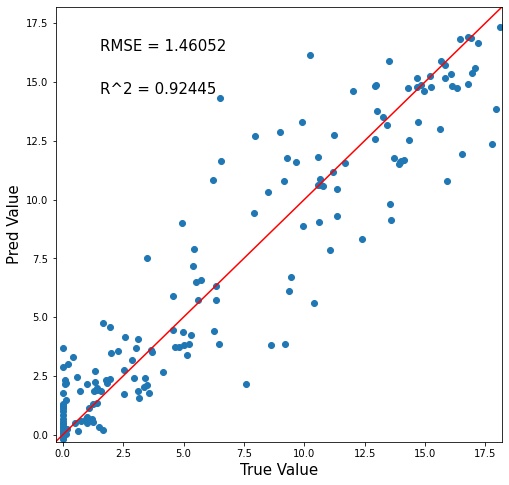

In [19]:
True_Pred_map(pred_df)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

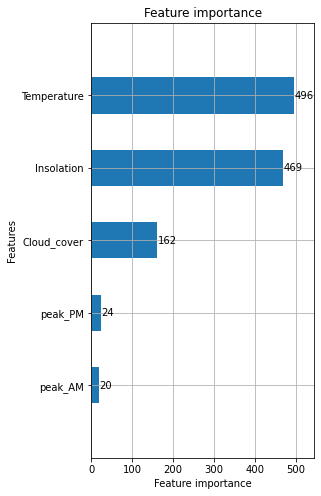

In [20]:
lgb.plot_importance(gbm, height=0.5, figsize=(4,8))

In [21]:
RMSE_list = []
count = []
for i in range(1, 15):
    params = {'boosting_type': 'gbdt',
          'objective': 'regression',
          'metric': 'rmse',
          'max_depth' : i}
    
    gbm = lgb.train(params,
                lgb_train,
                num_boost_round=10000,
                valid_sets=lgb_eval,
                early_stopping_rounds=100,
                verbose_eval=50)
    
    predicted = gbm.predict(X_test)
    pred_df = pd.concat([y_test.reset_index(drop=True), pd.Series(predicted)], axis=1)
    pred_df.columns = ['true', 'pred']
    RMSE = np.sqrt(mean_squared_error(pred_df['true'], pred_df['pred']))
    RMSE_list.append(RMSE)
    count.append(i)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000326 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 400
[LightGBM] [Info] Number of data points in the train set: 1419, number of used features: 5
[LightGBM] [Info] Start training from score 3.228734
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 1.94358
[100]	valid_0's rmse: 1.81871
[150]	valid_0's rmse: 1.78652
[200]	valid_0's rmse: 1.77979
[250]	valid_0's rmse: 1.77887
[300]	valid_0's rmse: 1.77968
Early stopping, best iteration is:
[222]	valid_0's rmse: 1.77807
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[50]	valid_0's rmse: 1.48709
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Info] Total Bins 400
[LightGBM] [Info] Number of data points in the train set: 1419, number of used features: 5
[LightGBM] [Info] Start training from score 3.228734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[50]	valid_0's rmse: 1.46

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	valid_0's rmse: 1.54431
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

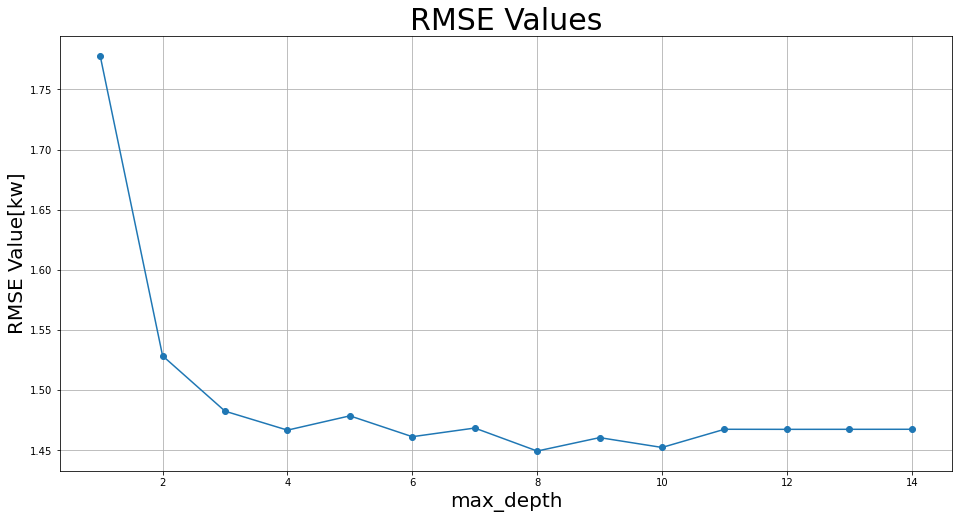

In [22]:
plt.figure(figsize=(16,8))
plt.plot(count, RMSE_list, marker="o")
plt.title("RMSE Values", fontsize=30)
plt.xlabel("max_depth", fontsize=20)
plt.ylabel("RMSE Value[kw]", fontsize=20)
plt.grid(True)

In [23]:
import matplotlib.pyplot as plt

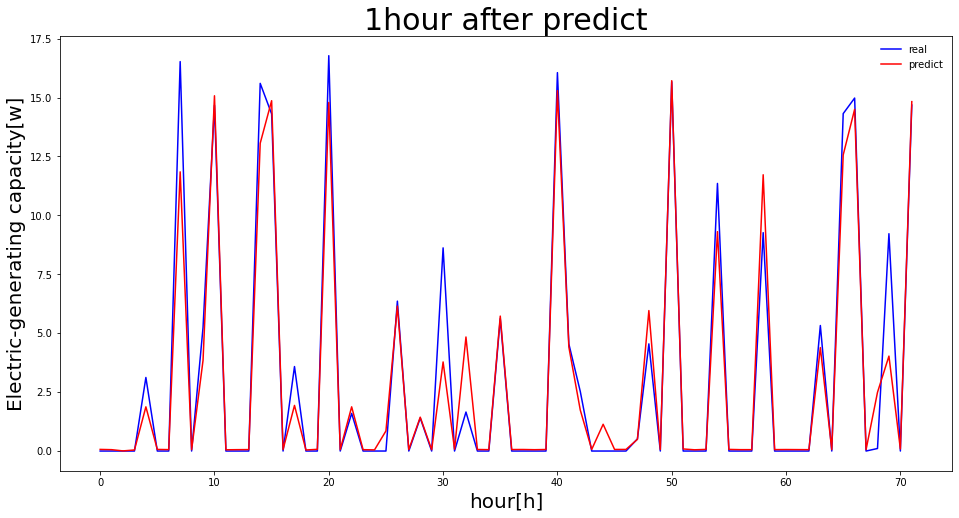

In [24]:
# 予測と実際のテストの終値のチャートをプロットしてみよう
plt.ion()
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot()
line1, = ax1.plot(pred_df['true'].head(72),'-b',label='real')
line2, = ax1.plot(pred_df['pred'].head(72),'-r',label='predict')
leg = ax1.legend(frameon=False)
plt.xlabel('hour[h]',fontsize=20)
plt.ylabel('Electric-generating capacity[w]',fontsize=20)
plt.title('1hour after predict',fontsize=30)
plt.show()